##Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the dataset

About this file
The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

In [58]:
df_cancer = pd.read_csv("/content/survey-lung-cancer.csv")

##Basic Data Info

In [48]:
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [49]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [50]:
df_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Check missing values

In [51]:
df_cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

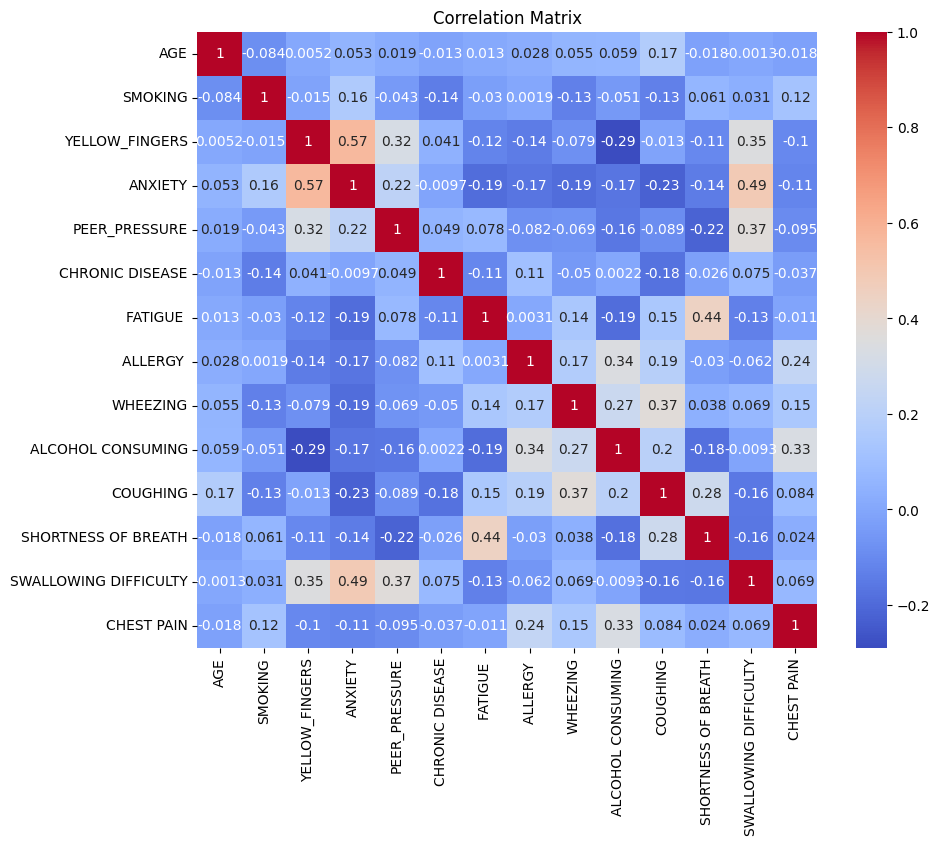

In [52]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cancer.corr(numeric_only=True), annot=True, cmap='coolwarm')
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
print(df_cancer.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [59]:
# Encoding categorical variables
label_encoder = LabelEncoder()
# List of categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                         'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
                         'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
# Iterate through columns
for column in categorical_columns:
    # Check if the column is present in the DataFrame
    if column in df_cancer.columns:
        df_cancer[column] = label_encoder.fit_transform(df_cancer[column])
    else:
        print(f"Column '{column}' not found in the dataset.")

# Display the modified DataFrame
print("\nDataFrame after encoding categorical variables:")
print(df_cancer.head())

Column 'FATIGUE' not found in the dataset.
Column 'ALLERGY' not found in the dataset.

DataFrame after encoding categorical variables:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         2         1         1                  1         1   
1                1         2         2         0                  0         0   
2                0         2         1         1                  0         1   
3                0         1         1         0                  1         0   
4                0         1         1         1         

In [60]:
# Neural Network Architecture
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# split into input (X) and output (Y) variables
X = df_cancer.iloc[:, 0:15]
Y = df_cancer.iloc[:, 15]

In [61]:
label_encoder = LabelEncoder()
X['GENDER'] = label_encoder.fit_transform(X['GENDER'])

In [62]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [63]:
# create model
model = Sequential()
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
#Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
21/21 [==============================] - 2s 28ms/step - loss: 0.8342 - accuracy: 0.8792 - val_loss: 0.4771 - val_accuracy: 0.8627
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4131 - accuracy: 0.8792 - val_loss: 0.4092 - val_accuracy: 0.8627
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 0.3627 - accuracy: 0.8792 - val_loss: 0.4070 - val_accuracy: 0.8627
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 0.3604 - accuracy: 0.8792 - val_loss: 0.3851 - val_accuracy: 0.8627
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 0.3588 - accuracy: 0.8792 - val_loss: 0.4216 - val_accuracy: 0.8627
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.3873 - accuracy: 0.8792 - val_loss: 0.4261 - val_accuracy: 0.8627
Epoch 7/50
21/21 [==============================] - 0s 10ms/step - loss: 0.3664 - accuracy: 0.8792 - val_loss: 0.3671 - val_accuracy: 0.8627
Epoch 8/50
21/21

In [66]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10/10 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9223
accuracy: 92.23%


In [67]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

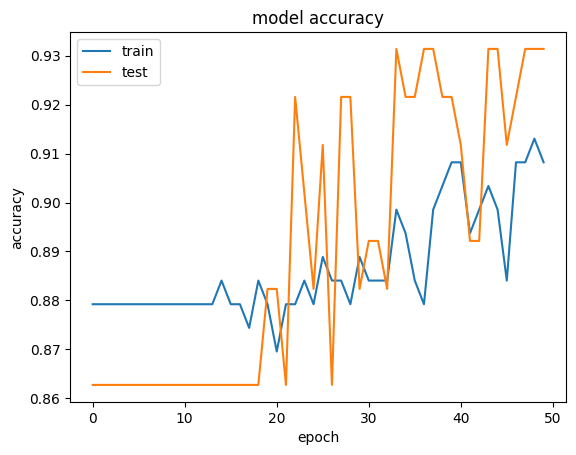

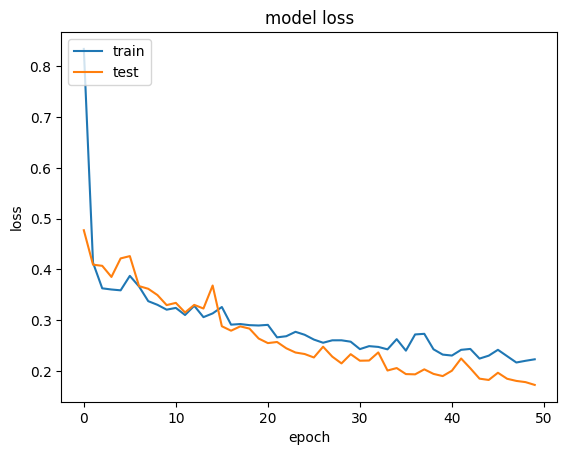

In [68]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
